In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
# from customplotting.general import plot_xy, save_fig
from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [4]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [5]:

A1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_24_22/A1_EDA0%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_24_22/A2_EDA0%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_24_22/A3_EDA1%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_24_22/A4_EDA1%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A5 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/A5_EDA10%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A6 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/A6_EDA10%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

B1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B1_EDA0%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B2_EDA0%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B3_EDA1%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B4_EDA1%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B5 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B5_EDA10%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B6 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B6_EDA10%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)



In [6]:
A1


,XAxis,Counts
0,0.000,4
1,0.032,5
2,0.064,2
3,0.096,6
4,0.128,7
...,...,...
31245,999.840,2
31246,999.872,6
31247,999.904,5
31248,999.936,5


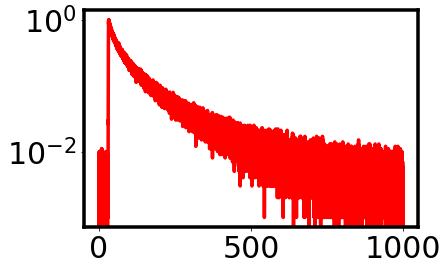

In [7]:
test = A5
plt.plot(test['XAxis'].values, test['Counts'].values/np.max(test['Counts'].values), label = 'A1', c= 'red')
plt.yscale('log')

In [8]:
A1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_24_22/A1_EDA0%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(A1['Counts']), delimiter=',',index_col=False)
A2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_24_22/A2_EDA0%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(A2['Counts']),delimiter=',',index_col=False)
A3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_24_22/A3_EDA1%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(A3['Counts']),delimiter=',',index_col=False)
A4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_24_22/A4_EDA1%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(A4['Counts']),delimiter=',',index_col=False)
A5_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/A5_EDA10%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A5['Counts']),delimiter=',',index_col=False)
A6_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/A6_EDA10%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A6['Counts']),delimiter=',',index_col=False)

B1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B1_EDA0%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(B1['Counts']), delimiter=',',index_col=False)
B2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B2_EDA0%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(B2['Counts']),delimiter=',',index_col=False)
B3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B3_EDA1%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(B3['Counts']),delimiter=',',index_col=False)
B4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B4_EDA1%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(B4['Counts']),delimiter=',',index_col=False)
B5_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B5_EDA10%_Br25_1.2M_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(B5['Counts']),delimiter=',',index_col=False)
B6_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/5_25_22/B6_EDA10%_Br25_1.4M_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(B6['Counts']),delimiter=',',index_col=False)


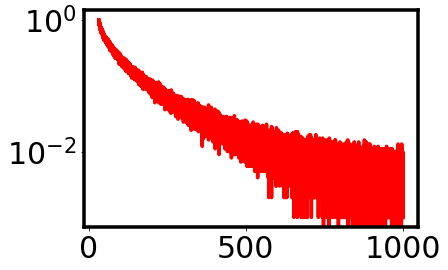

In [9]:
plt.plot(A1_fit['XAxis'].values, A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), label = 'A1', c= 'red')
plt.yscale('log')

In [15]:
stretched_A1 = stretch_exp_fit(A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), A1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A2 = stretch_exp_fit(A2_fit['Counts'].values/np.max(A2_fit['Counts'].values), A2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A3 = stretch_exp_fit(A3_fit['Counts'].values/np.max(A3_fit['Counts'].values), A3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A4 = stretch_exp_fit(A4_fit['Counts'].values/np.max(A4_fit['Counts'].values), A4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A5 = stretch_exp_fit(A5_fit['Counts'].values/np.max(A5_fit['Counts'].values), A5_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A6 = stretch_exp_fit(A6_fit['Counts'].values/np.max(A6_fit['Counts'].values), A6_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))

stretched_B1 = stretch_exp_fit(B1_fit['Counts'].values/np.max(B1_fit['Counts'].values), B1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B2 = stretch_exp_fit(B2_fit['Counts'].values/np.max(B2_fit['Counts'].values), B2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B3 = stretch_exp_fit(B3_fit['Counts'].values/np.max(B3_fit['Counts'].values), B3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B4 = stretch_exp_fit(B4_fit['Counts'].values/np.max(B4_fit['Counts'].values), B4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B5 = stretch_exp_fit(B5_fit['Counts'].values/np.max(B5_fit['Counts'].values), B5_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B6 = stretch_exp_fit(B6_fit['Counts'].values/np.max(B6_fit['Counts'].values), B6_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))


In [16]:
print("tau_c (ns) = "+str(stretched_A1[0]*1e9))
print("Beta = "+str(stretched_A1[1]))
print("avg. tau (ns) = "+str(stretched_A1[3]*1e9))

tau_c (ns) = 66.59535038064877
Beta = 0.6837663828461329
avg. tau (ns) = 86.25325461530127


In [17]:
stretched_A1

(6.659535038064877e-08,
 0.6837663828461329,
 0.999004282686476,
 8.625325461530127e-08,
 array([0.54214855, 0.54192496, 0.54170153, ..., 0.0017024 , 0.00170217,
        0.00170193]))

In [22]:
double_A1 = double_exp_fit(A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), A1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A2 = double_exp_fit(A2_fit['Counts'].values/np.max(A2_fit['Counts'].values), A2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A3 = double_exp_fit(A3_fit['Counts'].values/np.max(A3_fit['Counts'].values), A3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A4 = double_exp_fit(A4_fit['Counts'].values/np.max(A4_fit['Counts'].values), A4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A5 = double_exp_fit(A5_fit['Counts'].values/np.max(A5_fit['Counts'].values), A5_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A6 = double_exp_fit(A6_fit['Counts'].values/np.max(A6_fit['Counts'].values), A6_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

double_B1 = double_exp_fit(B1_fit['Counts'].values/np.max(B1_fit['Counts'].values), B1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B2 = double_exp_fit(B2_fit['Counts'].values/np.max(B2_fit['Counts'].values), B2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B3 = double_exp_fit(B3_fit['Counts'].values/np.max(B3_fit['Counts'].values), B3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B4 = double_exp_fit(B4_fit['Counts'].values/np.max(B4_fit['Counts'].values), B4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B5 = double_exp_fit(B5_fit['Counts'].values/np.max(B5_fit['Counts'].values), B5_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B6 = double_exp_fit(B6_fit['Counts'].values/np.max(B6_fit['Counts'].values), B6_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))



In [23]:
print("tau_1 (ns) = "+str(double_A2[0]*1e9))
print("a1 = "+str(double_A2[1]))
print("tau_2 (ns) = "+str(double_A2[2]*1e9))
print("a2 = "+str(double_A2[3]))
print("tau_avg (ns) = "+str(double_A2[4]*1e9))

tau_1 (ns) = 52.22185517184253
a1 = 0.9972534831513785
tau_2 (ns) = 265.06705811370733
a2 = 0.08939893298582974
tau_avg (ns) = 69.73263760013329


In [24]:
double_A1

(6.304387381519608e-08,
 0.9992639250844348,
 2.908635335443472e-07,
 0.10120869282266642,
 8.399608069912827e-08,
 array([0.68808468, 0.6877715 , 0.68745846, ..., 0.0032528 , 0.00325244,
        0.00325208]))

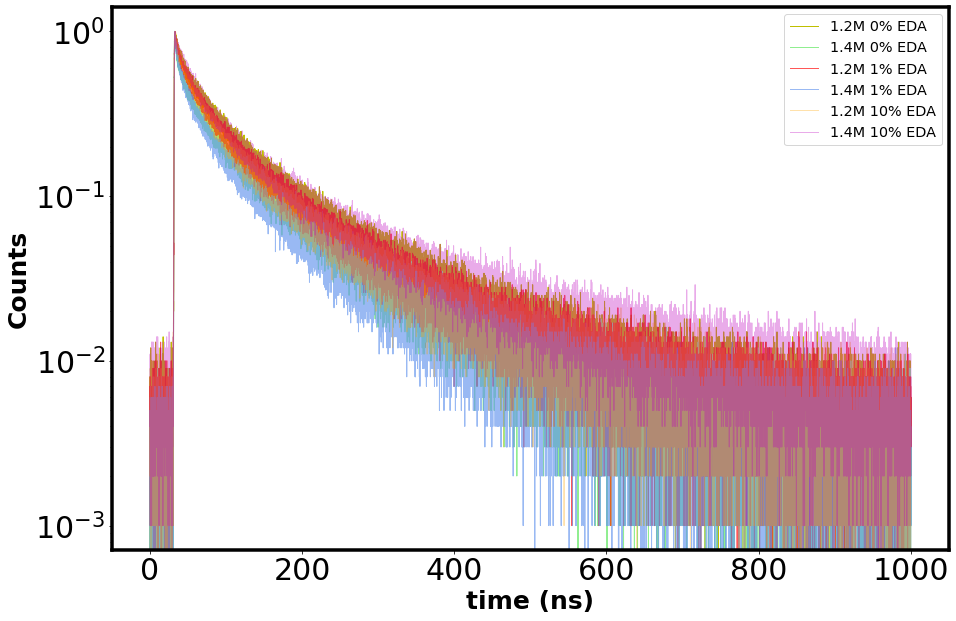

In [25]:
fig = plt.figure(figsize =(15, 10))

plt.plot(A1['XAxis'].values, A1['Counts'].values/np.max(A1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
plt.plot(A2['XAxis'].values, A2['Counts'].values/np.max(A2['Counts'].values),'lightgreen', lw=1 , label='A2', alpha = 1)
plt.plot(A3['XAxis'].values, A3['Counts'].values/np.max(A3['Counts'].values),'r', lw=1 , label='A3', alpha = 0.66)
plt.plot(A4['XAxis'].values, A4['Counts'].values/np.max(A4['Counts'].values),'cornflowerblue', lw=1 , label='A4', alpha = 0.66)
plt.plot(A5['XAxis'].values, A5['Counts'].values/np.max(A5['Counts'].values),'orange', lw=1 , label='A5', alpha = 0.33)
plt.plot(A6['XAxis'].values, A6['Counts'].values/np.max(A6['Counts'].values),'m', lw=1 , label='A6', alpha = 0.33)

plt.yscale('log')

fs = 25
plt.xlabel('time (ns)',{'fontsize': fs}, weight = "bold")
plt.ylabel('Counts',{'fontsize': fs}, weight = "bold")

plt.legend(["1.2M 0% EDA","1.4M 0% EDA", "1.2M 1% EDA", "1.4M 1% EDA", "1.2M 10% EDA", "1.4M 10% EDA"], fontsize = "x-large")

plt.show()

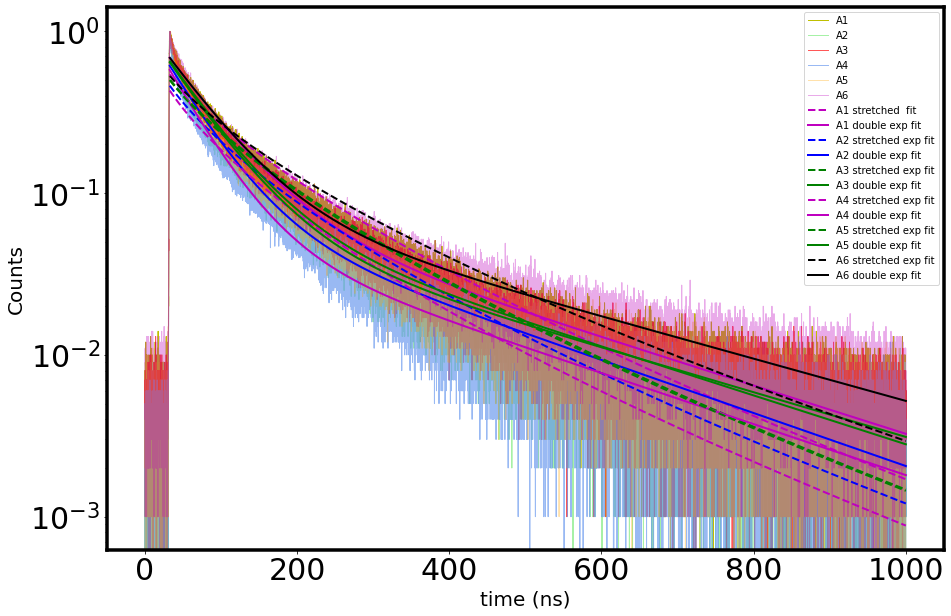

In [26]:

fig = plt.figure(figsize =(15, 10))

plt.plot(A1['XAxis'].values, A1['Counts'].values/np.max(A1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
plt.plot(A2['XAxis'].values, A2['Counts'].values/np.max(A2['Counts'].values),'lightgreen', lw=1 , label='A2', alpha = 0.8)
plt.plot(A3['XAxis'].values, A3['Counts'].values/np.max(A3['Counts'].values),'r', lw=1 , label='A3', alpha = 0.66)
plt.plot(A4['XAxis'].values, A4['Counts'].values/np.max(A4['Counts'].values),'cornflowerblue', lw=1 , label='A4', alpha = 0.66)
plt.plot(A5['XAxis'].values, A5['Counts'].values/np.max(A5['Counts'].values),'orange', lw=1 , label='A5', alpha = 0.33)
plt.plot(A6['XAxis'].values, A6['Counts'].values/np.max(A6['Counts'].values),'m', lw=1 , label='A6', alpha = 0.33)
plt.yscale('log')

plt.plot(A1_fit['XAxis'].values, stretched_A1[4], 'm--', lw = 2, label="A1 stretched  fit")
plt.plot(A1_fit['XAxis'].values, double_A1[5], 'm-', lw = 2, label="A1 double exp fit")

plt.plot(A2_fit['XAxis'].values, stretched_A2[4], 'b--', lw = 2, label="A2 stretched exp fit")
plt.plot(A2_fit['XAxis'].values, double_A2[5], 'b-', lw = 2, label="A2 double exp fit")

plt.plot(A3_fit['XAxis'].values, stretched_A3[4], 'g--', lw = 2, label="A3 stretched exp fit")
plt.plot(A3_fit['XAxis'].values, double_A3[5], 'g-', lw = 2, label="A3 double exp fit")

plt.plot(A4_fit['XAxis'].values, stretched_A4[4], 'm--', lw = 2, label="A4 stretched exp fit")
plt.plot(A4_fit['XAxis'].values, double_A4[5], 'm-', lw = 2, label="A4 double exp fit")

plt.plot(A5_fit['XAxis'].values, stretched_A5[4], 'g--', lw = 2, label="A5 stretched exp fit")
plt.plot(A5_fit['XAxis'].values, double_A5[5], 'g-', lw = 2, label="A5 double exp fit")

plt.plot(A6_fit['XAxis'].values, stretched_A6[4], 'k--', lw = 2, label="A6 stretched exp fit")
plt.plot(A6_fit['XAxis'].values, double_A6[5], 'k-', lw = 2, label="A6 double exp fit")

fs = 20
plt.xlabel('time (ns)',{'fontsize': fs})
plt.ylabel('Counts',{'fontsize': fs})
plt.legend(loc = "upper right", fontsize = "medium")

plt.show()

In [27]:

  
T1plotdata = [
    1e9*np.array([double_A1[0]]),
    1e9*np.array([double_A2[0]]),
    1e9*np.array([double_A3[0]]),                                                        
    1e9*np.array([double_A4[0]]),                                                        
    1e9*np.array([double_A5[0]]),                                                        
    1e9*np.array([double_A6[0]]),                                                        
    ]

T2plotdata = [
    1e9*np.array([double_A1[2]]),
    1e9*np.array([double_A2[2]]),
    1e9*np.array([double_A3[2]]),                                                        
    1e9*np.array([double_A4[2]]),
    1e9*np.array([double_A5[2]]),                                                        
    1e9*np.array([double_A6[2]]),
    ]

TAplotdata = [
    1e9*np.array([double_A1[4]]),
    1e9*np.array([double_A2[4]]),
    1e9*np.array([double_A3[4]]),                                                        
    1e9*np.array([double_A4[4]]),
    1e9*np.array([double_A5[4]]),                                                        
    1e9*np.array([double_A6[4]]),
    ]

TSplotdata = [
    1e9*np.array([stretched_A1[3]]),
    1e9*np.array([stretched_A2[3]]),
    1e9*np.array([stretched_A3[3]]),
    1e9*np.array([stretched_A4[3]]),
    1e9*np.array([stretched_A5[3]]),
    1e9*np.array([stretched_A6[3]]),
    ]

Bplotdata = [
    np.array([stretched_A1[1]]),
    np.array([stretched_A2[1]]),
    np.array([stretched_A3[1]]),
    np.array([stretched_A4[1]]),
    np.array([stretched_A5[1]]),
    np.array([stretched_A6[1]]),
    ]

BT1plotdata = [
    1e9*np.array([double_B1[0]]),
    1e9*np.array([double_B2[0]]),
    1e9*np.array([double_B3[0]]),                                                        
    1e9*np.array([double_B4[0]]),                                                        
    1e9*np.array([double_B5[0]]),                                                        
    1e9*np.array([double_B6[0]]),                                                        
    ]

BT2plotdata = [
    1e9*np.array([double_B1[2]]),
    1e9*np.array([double_B2[2]]),
    1e9*np.array([double_B3[2]]),                                                        
    1e9*np.array([double_B4[2]]),
    1e9*np.array([double_B5[2]]),                                                        
    1e9*np.array([double_B6[2]]),
    ]

BTAplotdata = [
    1e9*np.array([double_B1[4]]),
    1e9*np.array([double_B2[4]]),
    1e9*np.array([double_B3[4]]),                                                        
    1e9*np.array([double_B4[4]]),
    1e9*np.array([double_B5[4]]),                                                        
    1e9*np.array([double_B6[4]]),
    ]

BTSplotdata = [
    1e9*np.array([stretched_B1[3]]),
    1e9*np.array([stretched_B2[3]]),
    1e9*np.array([stretched_B3[3]]),
    1e9*np.array([stretched_B4[3]]),
    1e9*np.array([stretched_B5[3]]),
    1e9*np.array([stretched_B6[3]]),
    ]

BBplotdata = [
    np.array([stretched_B1[1]]),
    np.array([stretched_B2[1]]),
    np.array([stretched_B3[1]]),
    np.array([stretched_B4[1]]),
    np.array([stretched_B5[1]]),
    np.array([stretched_B6[1]]),
    ]

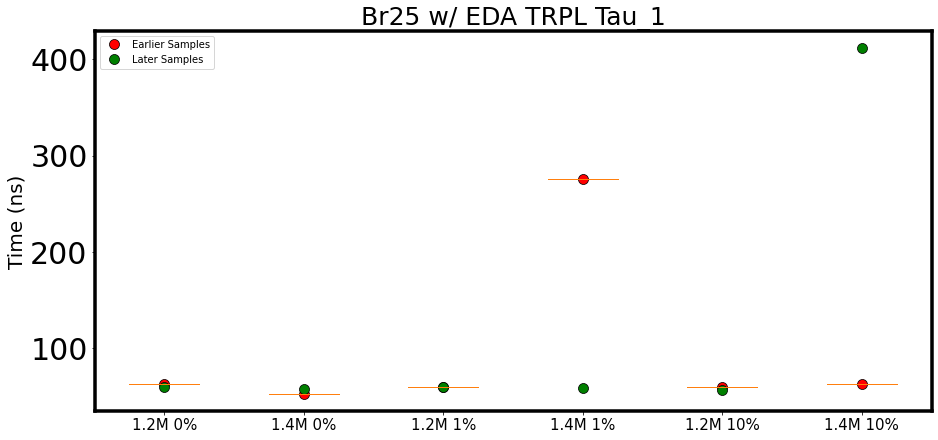

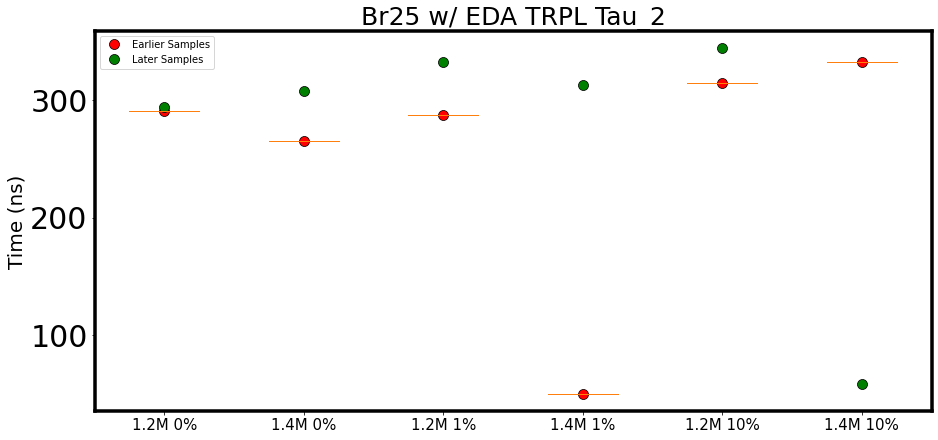

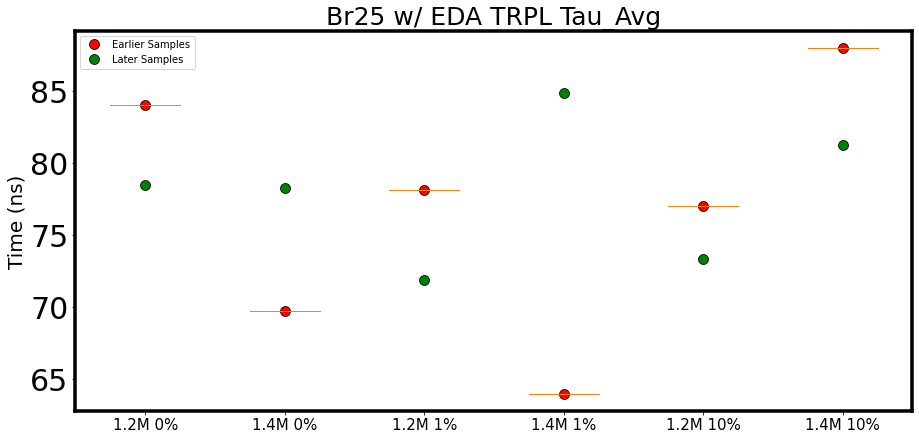

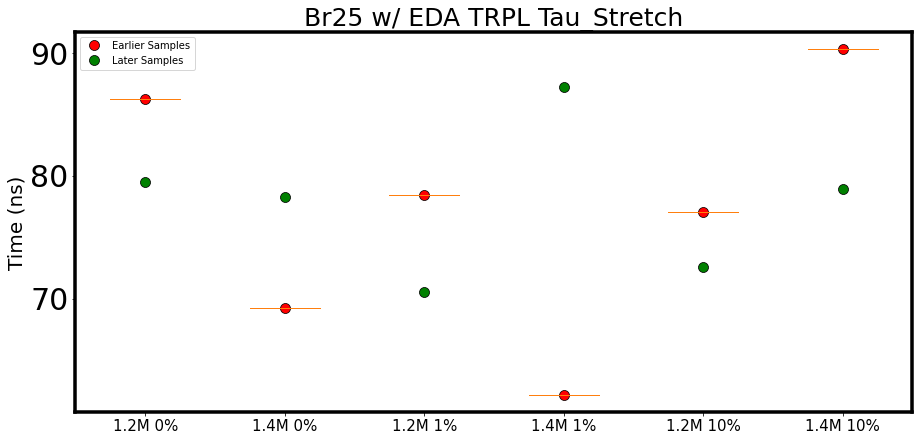

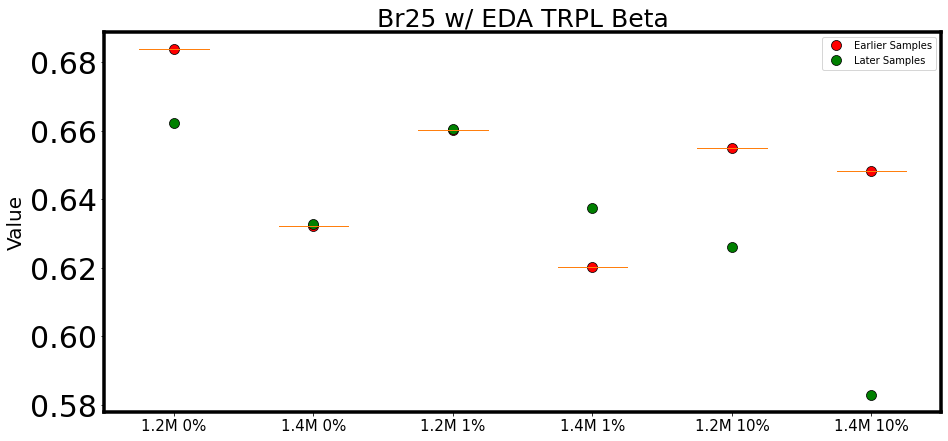

In [33]:
#############  Tau_1  ################
dotsize = 20
xsize = 15
ysize = 20
titlesize = 25
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(T1plotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4,5,6],T1plotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75", label = "Earlier Samples")
plt.plot([1,2,3,4,5,6],BT1plotdata, ".", color = "g", ms = dotsize, mec = "k", mew = "0.75", label = "Later Samples")


ax.set_xticklabels(["1.2M 0%","1.4M 0%", "1.2M 1%", "1.4M 1%", "1.2M 10%", "1.4M 10%"], fontsize = xsize)
plt.title("Br25 w/ EDA TRPL Tau_1", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()
################################################
#############  Tau_2  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(T2plotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4,5,6],T2plotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75", label = "Earlier Samples")
plt.plot([1,2,3,4,5,6],BT2plotdata, ".", color = "g", ms = dotsize, mec = "k", mew = "0.75", label = "Later Samples")


ax.set_xticklabels(["1.2M 0%","1.4M 0%", "1.2M 1%", "1.4M 1%", "1.2M 10%", "1.4M 10%"], fontsize = xsize)
plt.title("Br25 w/ EDA TRPL Tau_2", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()
################################################# 
#############  Tau_Avg  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(TAplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4,5,6],TAplotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75", label = "Earlier Samples")
plt.plot([1,2,3,4,5,6],BTAplotdata, ".", color = "g", ms = dotsize, mec = "k", mew = "0.75", label = "Later Samples")


ax.set_xticklabels(["1.2M 0%","1.4M 0%", "1.2M 1%", "1.4M 1%", "1.2M 10%", "1.4M 10%"], fontsize = xsize)
plt.title("Br25 w/ EDA TRPL Tau_Avg", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()
################################################## 
#############  Tau_Stretch  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(TSplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4,5,6],TSplotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75", label = "Earlier Samples")
plt.plot([1,2,3,4,5,6],BTSplotdata, ".", color = "g", ms = dotsize, mec = "k", mew = "0.75", label = "Later Samples")


ax.set_xticklabels(["1.2M 0%","1.4M 0%", "1.2M 1%", "1.4M 1%", "1.2M 10%", "1.4M 10%"], fontsize = xsize)
plt.title("Br25 w/ EDA TRPL Tau_Stretch", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()
####################################################
#############  Beta  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(Bplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4,5,6],Bplotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75", label = "Earlier Samples")
plt.plot([1,2,3,4,5,6],BBplotdata, ".", color = "g", ms = dotsize, mec = "k", mew = "0.75", label = "Later Samples")


ax.set_xticklabels(["1.2M 0%","1.4M 0%", "1.2M 1%", "1.4M 1%", "1.2M 10%", "1.4M 10%"], fontsize = xsize)
plt.title("Br25 w/ EDA TRPL Beta", fontsize = titlesize)
plt.ylabel("Value", fontsize = ysize)
plt.legend(fontsize = "medium")
plt.show()